In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import spacy
from textblob import TextBlob
import tweepy
from newspaper import Article
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [1]:
nltk.download('vader_lexicon')
nltk.download('punkt')

NameError: name 'nltk' is not defined

In [ ]:
sia = SentimentIntensityAnalyzer()

sentence = "Apple's new product has received rave reviews from critics. Everyone loves the new apple product! Great job, Apple!"
scores = sia.polarity_scores(sentence)
print(scores)

{'neg': 0.086, 'neu': 0.586, 'pos': 0.328, 'compound': 0.8011}


In [ ]:
url = 'https://www.cnbc.com/2024/10/04/apple-is-turning-to-its-army-of-developers-for-an-edge-in-the-ai-race.html?&qsearchterm=apple'
article = Article(url)

article.download()
article.parse()
text = article.text
print(text)

A view of Apple's new iPhone 16 at an Apple Store on the Regent Street in London, United Kingdom on September 20, 2024.

As Apple prepares Apple Intelligence to jump into Silicon Valley's AI race, it's relying on one of its strongest advantages: Its army of 34 million app developers.

IPhone users will get their first taste of Apple Intelligence, the company's artificial intelligence system, later this month. The company is relying on Apple Intelligence to be the strongest selling point for the iPhone 16, its latest generation of smartphones.

Apple's AI isn't as advanced as the state of the art coming out of the most advanced labs, such as rivals like OpenAI's ChatGPT, Google's Gemini and Meta's Llama. Apple isn't using the biggest models, nor can it pull off some of the more show-stopping tricks of the bleeding-edge voice models — OpenAI's latest can sing, for example.

Where Apple is hoping to distinguish its AI is that Siri may actually be able to do things on your phone — send ema

In [ ]:
scores = sia.polarity_scores(text)
print(scores)

{'neg': 0.018, 'neu': 0.843, 'pos': 0.139, 'compound': 0.9965}


In [ ]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
for ent in doc.ents:
    print(ent.text, ent.label_)

Apple ORG
iPhone ORG
16 CARDINAL
the Regent Street ORG
London GPE
United Kingdom GPE
September 20, 2024 DATE
Apple ORG
Apple Intelligence ORG
Silicon Valley's LOC
AI GPE
one CARDINAL
34 million CARDINAL
first ORDINAL
Apple Intelligence ORG
later this month DATE
Apple Intelligence ORG
Apple ORG
OpenAI ORG
Google ORG
Gemini ORG
Meta ORG
Llama PRODUCT
Apple ORG
OpenAI ORG
Apple ORG
AI GPE
Siri GPE
AI ORG
Apple ORG
third ORDINAL
Apple Intelligence ORG
Siri, ORG
Apple ORG
June DATE
hundreds CARDINAL
Apple ORG
Kelsey Peterson PERSON
Apple Intelligence ORG
Apple ORG
Apple Intelligence ORG
millions CARDINAL
non-Apple NORP
as many as hundreds CARDINAL
App Intents PRODUCT
Apple ORG
annual DATE
App Store PERSON
millions CARDINAL
third ORDINAL
one CARDINAL
Apple ORG
AI GPE
Jordan Morgan PERSON
App Intents PERSON
Apple ORG
millions CARDINAL
Apple Intelligence ORG
last year's DATE
15 CARDINAL
16 CARDINAL
this year DATE
Apple ORG
Siri GPE
Siri GPE


In [ ]:
client = tweepy.Client(
    bearer_token='AAAAAAAAAAAAAAAAAAAAAAxp0AEAAAAAOlMfaMmWluJHkqtWaI4tK%2Ff1O2I%3DyTGa8U9dgcCAY3TILucgNGRpQQ6Oala7xsWBPEGBt1fue6Hxyk',
    consumer_key='TZAGJHDHylimNuPSEEDr38ddA',
    consumer_secret='ZwBAt2IieckHCDjCsYBQ14Lnaaf3ZnHeTPNaGZAHOk2KWlBoNc',
    access_token='883451758659239937-WsgdffhRF79JMRa2c5yhZ5k54vPmnKC',
    access_token_secret='rsQMoSphf84sErGInLehvxUeQNR5hOEKmlt0mXu1dmC4Z'
)


In [ ]:
response = client.search_recent_tweets(query="Apple", max_results=100)
for tweet in response.data:
    print(tweet.text)

RT @timetravelr_: An Apple a day...an original wallpaper by the Time Traveler ✨ https://t.co/KhtQcLmNwg
@LeoDuffOff Pourquoi je trouve ça normal de la part d'apple de faire de la merde avec un bel emballage ?
RT @KeniaOsReport: 🇲🇽 Apple Music México:

#98. “Una Nada Más” — Los @AngelesAzulesMx &amp; @KeniaOS (+13) *New Peak*

 https://t.co/4bvHQYkkDP
RT @AppleMusic: j-hope of @bts_bighit drops another infectious single while on his HOPE ON THE STAGE tour. “MONA LISA” is out now: https://…
@Elitheggoat1 Inbox 📨 me with your cash tag or PayPal or Apple pay or Zelle or venmo and get spoiled immediately now 💙💙💙https://t.co/qyFpdop0AG
RT @Big_Aby: 🐐❤️ https://t.co/X4uG5FirDi
Apple Bottom Jeans Ad featured in the June Issue of Vibe Magazine (2003) https://t.co/a39YKSUpC2
RT @mba_phone_store: APPLE WATCH ⌚️ 

SERIES 7 
45MM
 
N 315,000

✅UK USED 
✅Dm/Call :07032655719 

📍KADUNA

RETWEET 🙏🏽🙏🏽 https://t.co/fCl5…
@tanyakanrl Semuanya authorized reseller apple jadi sama aja, beda di kodenya dan g

In [ ]:
tweet_texts = [tweet.text for tweet in response.data]
scores = [sia.polarity_scores(text)['compound'] for text in tweet_texts]

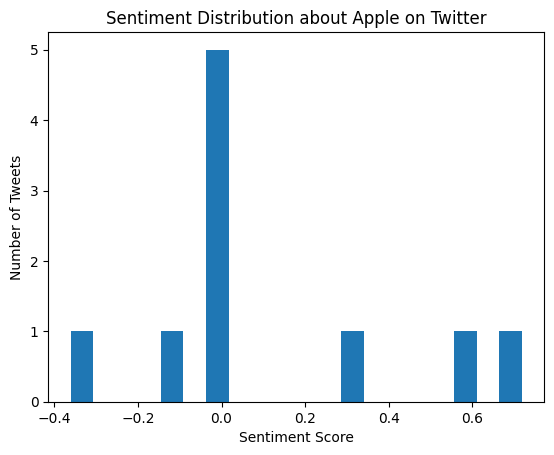

In [ ]:
plt.hist(scores, bins=20)
plt.title('Sentiment Distribution about Apple on Twitter')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Tweets')
plt.show()